### 딥-러닝 과정 Mulit Layer Perceptron(MLP) 

## Keras 모델 생성/학습 - 당뇨병 예측 모델

In [1]:
# 1. Pandas 가져오기
import pandas as pd

In [2]:
# 2. 데이터 불러오기
df = pd.read_csv('diabetes_data.csv')
df

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


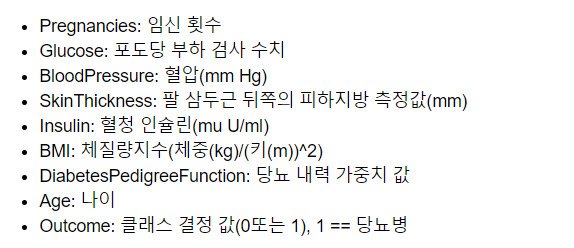

In [3]:
# null값은 아니지만 0이 들어가고있다.
df.describe(include='all')

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:title={'center':'Diabetes'}>

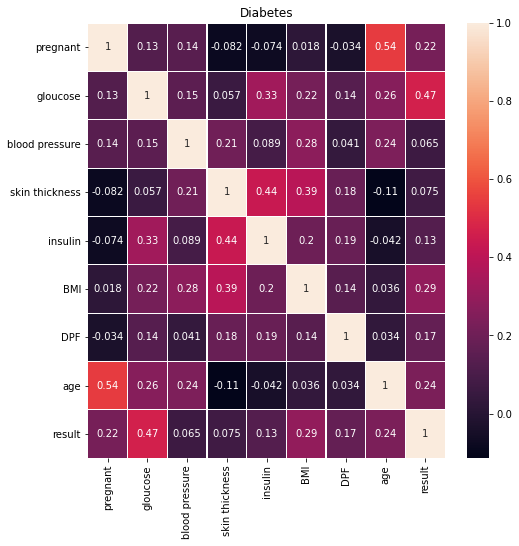

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8,8))
plt.title('Diabetes')
sns.heatmap(df.corr(), linewidths = 0.1, linecolor = 'white', annot=True)

In [5]:
df['gloucose'].replace(0, df['gloucose'].mean(), inplace=True)
# gloz_zero = data.loc[df.gloucose == 0, 'gloucose']

In [6]:
df['blood pressure'].replace(0, df['blood pressure'].mean(), inplace=True)

In [7]:
df['skin thickness'].replace(0, df['skin thickness'].mean(), inplace=True)

In [8]:
df['insulin'].replace(0, df['insulin'].mean(), inplace=True)

In [9]:
df['BMI'].replace(0, df['BMI'].mean(), inplace=True)

In [10]:
df.describe(include='all')

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# 3. X/y 나누기

y = df.iloc[:, -1]
X = df.drop(['result'], axis=1, inplace=False)

print(X)
print(y)

     pregnant  gloucose  blood pressure  skin thickness     insulin   BMI  \
0           6     148.0            72.0       35.000000   79.799479  33.6   
1           1      85.0            66.0       29.000000   79.799479  26.6   
2           8     183.0            64.0       20.536458   79.799479  23.3   
3           1      89.0            66.0       23.000000   94.000000  28.1   
4           0     137.0            40.0       35.000000  168.000000  43.1   
..        ...       ...             ...             ...         ...   ...   
763        10     101.0            76.0       48.000000  180.000000  32.9   
764         2     122.0            70.0       27.000000   79.799479  36.8   
765         5     121.0            72.0       23.000000  112.000000  26.2   
766         1     126.0            60.0       20.536458   79.799479  30.1   
767         1      93.0            70.0       31.000000   79.799479  30.4   

       DPF  age  
0    0.627   50  
1    0.351   31  
2    0.672   32  
3  

In [12]:
# 4. Train set, Test set 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

# val data로 나누기
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=123)

# print(X_train.shpae)
# print(X_val.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_val.shape)
# print(y_test.shape)

In [13]:
# 5. Keras 패키지 가져오기
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Dropout

In [14]:
# 6. MLP 모델 생성

model = keras.Sequential()

# 2의 제곱으로 하는 것이 좋다.
# model.add(Dense(input_dim=X_train.shpae[1])) 이런식으로도 표현이 가능하다.
# units는 생략이 가능해서 생략하고도 사용이 가능하다.
model.add(Dense(input_dim=8, units=128))
model.add(Activation('relu'))

## 오버피팅은 dropout과 l2같은 규제를 통해서 가능하다.
# 1) Dropout
# Dropout : 우리가 가진 노드에 몇퍼센트를 아웃시킬것인가를 의미한다.(0~1 사이의 값) 보통은 0.2나 0.5를 많이 사용한다.
# 오버피팅을 줄이는데 사용하고 너무 많이 dropout시키면 학습이 이루어지지않을 수도 있다.
#model.add(layers.Dropout(0.2))

# 2) 규제
# Dense안에 regularizer를 사용해서 L2규제를 줄 수 있다.
model.add(Dense(units=128,kernel_regularizer=keras.regularizers.L2(0.1)))
model.add(Activation('relu'))


model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 17,793
Trainable params: 17,793
Non-trainable params: 0
____________________________________________________

In [15]:
# 7. Compile - Optimizer, Loss function 설정

# 왠만해서는 defalut adam으로 사용하면 거의 다 된다.
#adam = keras.optimizers.Adam(lr=0.08)
# 계산하면서 metric도 같이 보여주기를 지정할 수 있다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# 8. 학습시키기
# 데이터가 많으니 batch_size를 높여서 진행해도 된다.
# batch_size와 epochs는 따로 변수로 지정해서 사용해줘도 괜찮다.
# verbost = 0은 진행되는걸 보지 않겠다. 1: 학습되는걸 보겠다. 2: 프로그래스를 안보고 loss값만 보겠다.
# 학습이 끝까지 진행되지않고 적당한 선에서 끝낼 수가 있다.
from keras.callbacks import EarlyStopping

# 빠른 종료
# vla이 계속해서 값이 왔다갔다하니깐 patience을 사용해서 몇번의 벗어남을 봐줄지를 정해준다. 
# 데이터가 몇번에서 overfitting에서 일어나는지 확인하고 값을 지정해줘도 된다.
early_stopping = EarlyStopping(monitor='vla_loss', patience=10)

# early_stopping을 cllbacks안에 넣어준다.
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, epochs=300, verbose=1, callbacks=[early_stopping])

Epoch 1/300
5/5 [==============================] - 1s 121ms/step - loss: 14.6222 - accuracy: 0.5576 - val_loss: 13.6404 - val_accuracy: 0.6423
Epoch 2/300
5/5 [==============================] - 0s 10ms/step - loss: 13.2030 - accuracy: 0.5885 - val_loss: 11.7400 - val_accuracy: 0.6748
Epoch 3/300
5/5 [==============================] - 0s 11ms/step - loss: 11.8103 - accuracy: 0.6658 - val_loss: 11.0179 - val_accuracy: 0.6260
Epoch 4/300
5/5 [==============================] - 0s 9ms/step - loss: 11.1030 - accuracy: 0.5807 - val_loss: 10.5107 - val_accuracy: 0.6585
Epoch 5/300
5/5 [==============================] - 0s 10ms/step - loss: 10.4373 - accuracy: 0.6231 - val_loss: 9.6621 - val_accuracy: 0.6504
Epoch 6/300
5/5 [==============================] - 0s 10ms/step - loss: 9.5574 - accuracy: 0.6803 - val_loss: 9.0128 - val_accuracy: 0.7480
Epoch 7/300
5/5 [==============================] - 0s 9ms/step - loss: 8.9012 - accuracy: 0.7002 - val_loss: 8.4632 - val_accuracy: 0.7236
Epoch 8/300


In [17]:
# 9. 모델 평가하기
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict_classes(X_test)))
train_result = model.evaluate(X_train, y_train)
test_result = model.evaluate(X_test, y_test)

print(train_result, test_result)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.88      0.70      0.78        10

    accuracy                           0.87        31
   macro avg       0.87      0.83      0.84        31
weighted avg       0.87      0.87      0.87        31

20/20 [==============================] - 0s 892us/step - loss: 0.8034 - accuracy: 0.7818


/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1/1 [==============================] - 0s 16ms/step - loss: 0.7329 - accuracy: 0.8710
[0.8033844828605652, 0.7817589640617371] [0.7328575849533081, 0.8709677457809448]


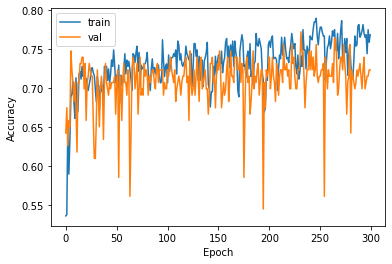

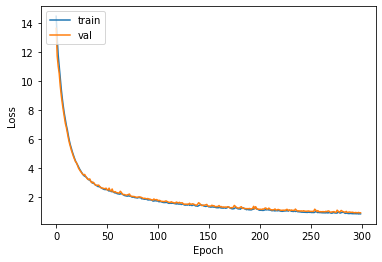

In [18]:
# 10. 학습 시각화하기

import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss 그래프
# overfitting에서는 accuracy가 아닌 loss로 확인을 해야한다. overfitting이라도 accuracy에 큰 차이가 없을 수가 있다.
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss 그래프에서 train이 감소하고 test가 증가하면 overfitting
# loss 그래프에가 일정한 값으로 유지되면 underfitting
# 규제나 dropout을 자주 사용하면 accuracy가 감소할 수도 있으니, overfitting을 줄이고 accuracy의 성능도 유지하면서 봐야한다.